# Assignment 2
# Ling Fei Zhang, 260985358
# Brandon Ma, 260983550

## Question 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions import SARSA
import time
import gymnasium as gym
import random
from tqdm import tqdm

c:\Users\Ling0\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Here, we will set a few parameters for our environment.

In [2]:
ALPHAS = [0.1, 0.3, 0.6]
GAMMA = 0.95
TEMPERATURE = [0.5, 50, 100]
EPISODES = 5500
SEEDS = np.arange(10)
EPSILON = 0.2

Driver Code to test out the combination of each alpha with each temperature for SARSA.

In [3]:
env = gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=True)
env.reset()
sarsa = SARSA(env, 0.1, 0.5, GAMMA, EPISODES, False, EPSILON)
sarsa.simulate_episodes()
final_policy = sarsa.learned_policy
print("final policy:\n", final_policy.reshape(4,4)) #tabular format to better visualize
train_reward = sarsa.train_reward()
print(f"train reward: {train_reward}")
test_reward = sarsa.test_reward()
print(f"test reward: {test_reward}")
# reward = sarsa.reward
# print("total reward: \n", reward)


#uncomment this line if you want to vizualize the game
# sarsa.visualize(10)

final policy:
 [[3. 3. 0. 1.]
 [0. 2. 2. 2.]
 [3. 1. 0. 2.]
 [3. 1. 1. 1.]]
train reward: 0.013527595427905593
test reward: 0.03217225885613059


### Effect of parameters on final training performance for SARSA

  0%|          | 0/3 [00:00<?, ?it/s]C:\Users\Ling0\AppData\Local\Temp\ipykernel_8892\3222918116.py:6: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(seed)
100%|██████████| 3/3 [03:41<00:00, 73.96s/it]


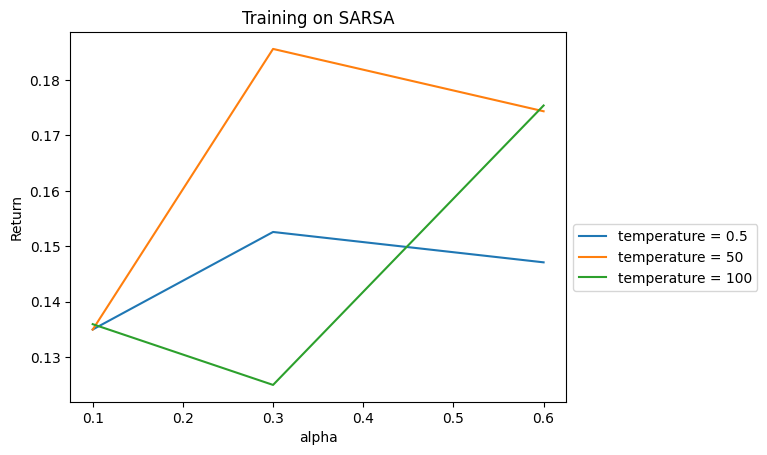

In [4]:
for temp in tqdm(TEMPERATURE):
    rewards_train = []
    for alpha in ALPHAS:
        average_reward_train = 0
        for seed in SEEDS:
            random.seed(seed)
            
            env = gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=True)
            env.reset()
            sarsa = SARSA(env, alpha, temp, GAMMA, EPISODES, False, EPSILON)
            sarsa.simulate_episodes()
            # final_policy = sarsa.learned_policy
            train_reward = sarsa.train_reward()
            average_reward_train += train_reward
            
        average_reward_train = average_reward_train/10
        rewards_train.append(average_reward_train)
        
    plt.plot(ALPHAS, rewards_train, label = f"temperature = {temp}")

plt.legend(bbox_to_anchor = (1, 0.5), loc = "best")
plt.title("Training on SARSA")
plt.xlabel("alpha")
plt.ylabel("Return")
plt.show()

### Effect of parameters on final testing performance for SARSA

  0%|          | 0/3 [00:00<?, ?it/s]C:\Users\Ling0\AppData\Local\Temp\ipykernel_8892\2728649465.py:6: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(seed)
100%|██████████| 3/3 [03:57<00:00, 79.14s/it]


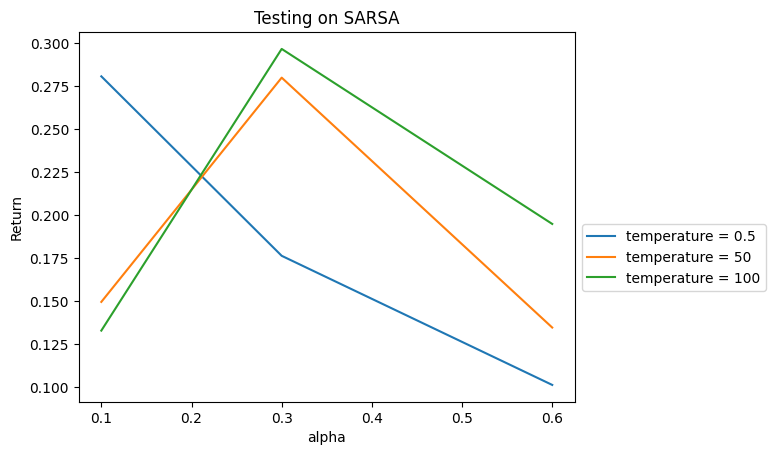

In [5]:
for temp in tqdm(TEMPERATURE):
    rewards_test = []
    for alpha in ALPHAS:
        average_reward_test = 0
        for seed in SEEDS:
            random.seed(seed)
            
            env = gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=True)
            env.reset()
            sarsa = SARSA(env, alpha, temp, GAMMA, EPISODES, False, EPSILON)
            sarsa.simulate_episodes()
            # final_policy = sarsa.learned_policy
            test_reward = sarsa.test_reward()
            average_reward_test += test_reward
            
        average_reward_test = average_reward_test/10
        rewards_test.append(average_reward_test)
        
    plt.plot(ALPHAS, rewards_test, label = f"temperature = {temp}")

plt.legend(bbox_to_anchor = (1, 0.5), loc = "best")
plt.title("Testing on SARSA")
plt.xlabel("alpha")
plt.ylabel("Return")
plt.show()

### Best parameter for SARSA
We will pick the best hyperparameter based on the testing set. Then, the best paramaters for SARSA is when $\alpha = 0.1$ and temperature = 100. We can then use these parameters to plot a graph below

  0%|          | 0/10 [00:00<?, ?it/s]C:\Users\Ling0\AppData\Local\Temp\ipykernel_8892\2800792591.py:3: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(seed)
100%|██████████| 10/10 [00:23<00:00,  2.37s/it]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


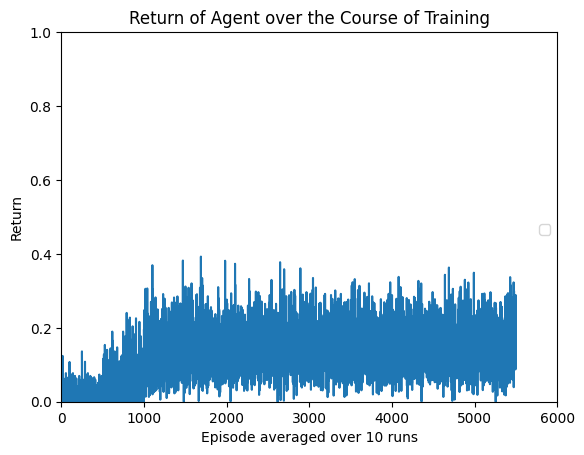

In [7]:
train_reward = []
for seed in tqdm(SEEDS):
    random.seed(seed)
    env = gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=True)
    env.reset()
    sarsa = SARSA(env, 0.1, 50, GAMMA, EPISODES, False, EPSILON) #best params chosen
    sarsa.simulate_episodes()
    reward = sarsa.reward
    train_reward.append(reward)

train_reward = np.array(train_reward)
train_reward = np.mean(train_reward, axis=0)    
x = np.arange(5500)

plt.plot(x, train_reward)
plt.legend(bbox_to_anchor = (1, 0.5), loc = "best")
plt.title("Return of Agent over the Course of Training for SARSA")
plt.xlabel("Episode averaged over 10 runs")
plt.ylabel("Return")
plt.xlim(0, 6000)
plt.ylim(0, 1)
plt.show()

### Conclusion for SARSA

<!-- From both graphs above, we can see that $\alpha = 0.1$ and temperature = 50 gives the best result. There are a few comments that we can make about these two graphs. -->

First, we notice that the return by the agent is quite small. This can be due from a few different reasons. One of the main one is the fact that the environment is slippery. This means that the player will only move to its intended direction with probability $\frac{1}{3}$, and in either perpendicular directions with equal probability of $\frac{1}{3}$. This is a huge draw back for the agent, as it can not just follow the path that one would in a non-slippery environment. For example, if the environment is non-slippery and the agent is at the start state, then the agent would go down twice (state 1 to 5 to 9). However, given a slippery environment, the agent cannot choose to go down at state 5. This is because it has just a good a chance to go into the hole on the right, as it does to go down. Thus, it must learn to go left, in the hope to eventually slip downwards. However, this makes the number of steps per episode a lot larger, and thus decreases the return by the agent. 

Second, we can also analyze the effect of $\alpha$ on the graphs. $\alpha$ weights the importance of the TD error in the updating step. In other words, the importance in difference between the predicted value at a state-action pair and the boostrapped estimate. From our results, we observe that an $\alpha$ value of 0.3 is best during training, and $\alpha = 0.1$ is optimal during testing. 

Finally, we can see that a temperature of 50 is optimal for both the training process and the testing. As we use softmax exploration during learning, temperature is a hyperparameter that balances the probability distribution for a greedy pick and an equal pick between the state-action values. Since the softmax exploration is given as follows
\begin{equation*}
    \frac{\exp{(Q_t(s,a)/\tau)}}{\sum_{i \in A} \exp{(Q_t(s,i)/\tau)}}
\end{equation*}
we can see that as $\tau \rightarrow 0$, softmax exploration becomes like a greedy action selection. On the other hand, as $\tau \rightarrow \infty$, softmax results in picking an action at random (i.e. with equal probability). 

### Effect of parameters on final training performance for EXPECTED SARSA

In [ ]:
for temp in tqdm(TEMPERATURE):
    rewards_train = []
    for alpha in ALPHAS:
        average_reward_train = 0
        for seed in SEEDS:
            random.seed(seed)
            
            env = gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=True)
            env.reset()
            sarsa = SARSA(env, alpha, temp, GAMMA, EPISODES, True, EPSILON)
            sarsa.simulate_episodes()
            # final_policy = sarsa.learned_policy
            train_reward = sarsa.train_reward()
            average_reward_train += train_reward
            
        average_reward_train = average_reward_train/10
        rewards_train.append(average_reward_train)
        
    plt.plot(ALPHAS, rewards_train, label = f"temperature = {temp}")

plt.legend(bbox_to_anchor = (1, 0.5), loc = "best")
plt.title("Training on Expected SARSA")
plt.xlabel("alpha")
plt.ylabel("Return")
plt.show()

### Effect of parameters on final testing performance for EXPECTED SARSA

In [ ]:
for temp in tqdm(TEMPERATURE):
    rewards_test = []
    for alpha in ALPHAS:
        average_reward_test = 0
        for seed in SEEDS:
            random.seed(seed)
            
            env = gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=True)
            env.reset()
            sarsa = SARSA(env, alpha, temp, GAMMA, EPISODES, False, EPSILON)
            sarsa.simulate_episodes()
            # final_policy = sarsa.learned_policy
            test_reward = sarsa.test_reward()
            average_reward_test += test_reward
            
        average_reward_test = average_reward_test/10
        rewards_test.append(average_reward_test)
        
    plt.plot(ALPHAS, rewards_test, label = f"temperature = {temp}")

plt.legend(bbox_to_anchor = (1, 0.5), loc = "best")
plt.title("Testing on Expected SARSA")
plt.xlabel("alpha")
plt.ylabel("Return")
plt.show()

### Best parameter for EXPECTED SARSA

In [ ]:
train_reward = []
for seed in tqdm(SEEDS):
    random.seed(seed)
    env = gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=True)
    env.reset()
    sarsa = SARSA(env, 0.1, 50, GAMMA, EPISODES, True, EPSILON) #best params chosen
    sarsa.simulate_episodes()
    reward = sarsa.reward
    train_reward.append(reward)

train_reward = np.array(train_reward)
train_reward = np.mean(train_reward, axis=0)    
x = np.arange(5500)

plt.plot(x, train_reward)
plt.legend(bbox_to_anchor = (1, 0.5), loc = "best")
plt.title("Return of Agent over the Course of Training for Expected SARSA")
plt.xlabel("Episode averaged over 10 runs")
plt.ylabel("Return")
plt.xlim(0, 6000)
plt.ylim(0, 1)
plt.show()

### Conclusion for EXPECTED SARSA

Conclusion